In [1]:
import polars as pl
import gzip
import shutil
import matplotlib.pyplot as plt
import datetime
import pandas as pd

# Data Prep and Cleaning

In [2]:
# csv_fp = 'crime.csv'
# gz_fp = 'data/crime.csv.gz'

# with open(csv_fp, 'rb') as f_in:
#     with gzip.open(gz_fp, 'wb') as f_out:
#         shutil.copyfileobj(f_in, f_out)

In [3]:
data = pd.read_csv('data/crime.csv.gz')
data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [4]:
data.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [5]:
data = data.rename(columns={'DATE OCC': 'date_occured',
                    'Date Rptd': 'date_reported',
                    'TIME OCC': 'time_occured',
                    'Premis Cd': 'premis_code',
                    'Premis Desc': 'premis_description',
                    'Weapon Used Cd': 'weapon_code',
                    'Weapon Desc': 'weapon_description',
                    'Crm Cd': 'crime_code',
                    'Crm Cd Desc': 'crime_description',
                    'Vict Age': "victim_age",
                    'Vict Sex': 'victim_sex',
                    'Vict Descent': 'victim_race',
                    'Crm Cd 1': 'crime_code_1',
                    'Crm Cd 2': 'crime_code_2',
                    'Crm Cd 3': 'crime_code_3',
                    'Crm Cd 4': 'crime_code_4',
                    'Status Desc': 'status_descriptions',
                    'Rpt Dist No': 'district_number',
                    'Mocodes' : 'mo_codes'
                            })

In [6]:
data['victim_race'] = data['victim_race'].fillna('X')

In [7]:
map_race = {'A': 'Other Asian',
            'B' : 'Black',
            'C' : 'Chinese',
            'D' : 'Cambodian',
            'F' : 'Filipino',
            'G' : 'Guamanian',
            'H' : 'Hispanic', 
            'I' : 'American Indian',
            'J' : 'Japanese',
            'K' : 'Korean',
            'L' : 'Laotian',
            'O' : 'Other',
            'P' : 'Pacific Islander', 
            'S' : 'Samoan', 
            'U' : 'Hawaiian',
            'V' : 'Vietnamese',
            'W' : 'White',
            'X' : 'Unknown',
            'Z' : 'Asian Indian'
}
data['victim_race'] = data['victim_race'].map(map_race)

In [8]:
data['mo_codes'] = data['mo_codes'].str.split(' ')

In [9]:
data.head()

,DR_NO,date_reported,date_occured,time_occured,AREA,AREA NAME,district_number,Part 1-2,crime_code,crime_description,...,Status,status_descriptions,crime_code_1,crime_code_2,crime_code_3,crime_code_4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [10]:
data.loc[data['crime_code_1'].isna(), 'crime_code_1'] = data[data['crime_code_1'].isna()]['crime_code_2']

In [11]:
data['crime_code_2'] = data['crime_code_2'].fillna(0)
data['crime_code_3'] = data['crime_code_3'].fillna(0)
data['crime_code_4'] = data['crime_code_4'].fillna(0)
data['weapon_code'] = data['weapon_code'].fillna(0)

In [12]:
data['time_occured'] = data['time_occured'].astype(str).str.zfill(4).astype(int)

In [13]:
data['year_occured'] = pd.to_datetime(data['date_occured'], format='mixed').dt.year
data['month_year_occured'] = pd.to_datetime(data['date_occured'], format='mixed').dt.to_period('M')
data['hour_occured'] = data['time_occured'] // 100

# Exploratory Data Analysis (EDA)

In [14]:
from datetime import time

In [15]:
crime_by_precinct = data.groupby('AREA NAME')['DR_NO'].count().sort_values(ascending=False)
crime_by_race = data.groupby('victim_race')['DR_NO'].count().sort_values(ascending=False)
crime_by_gender = data.groupby('victim_sex')['DR_NO'].count().sort_values(ascending=False)
crime_by_year = data.groupby('year_occured')['DR_NO'].count().sort_index(ascending=True)
crime_by_month_year = data.groupby('month_year_occured')['DR_NO'].count().sort_index(ascending=True)
crime_by_hour = data.groupby('hour_occured')['DR_NO'].count().sort_index(ascending=True)
crime_by_type = data.groupby('crime_code')['DR_NO'].count().sort_values(ascending=False)

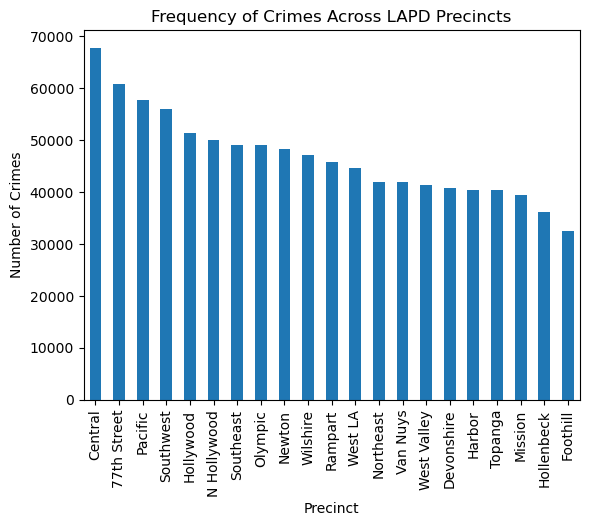

In [16]:
crime_by_precinct.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Frequency of Crimes Across LAPD Precincts')
plt.ylabel('Number of Crimes')
plt.xlabel('Precinct')
plt.show()

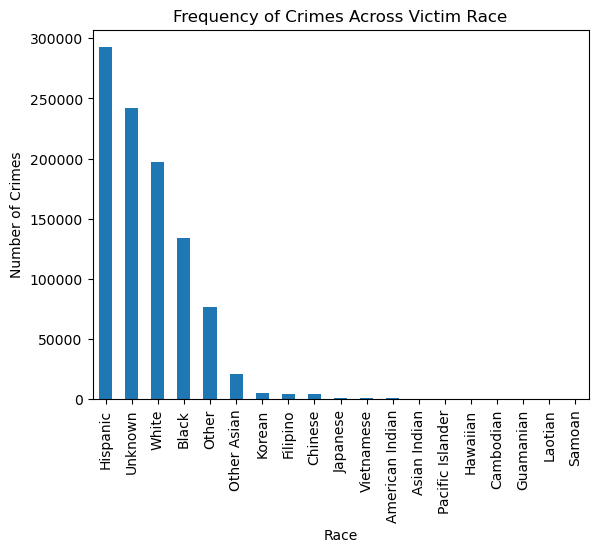

In [17]:
crime_by_race.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Frequency of Crimes Across Victim Race')
plt.ylabel('Number of Crimes')
plt.xlabel('Race')
plt.show()

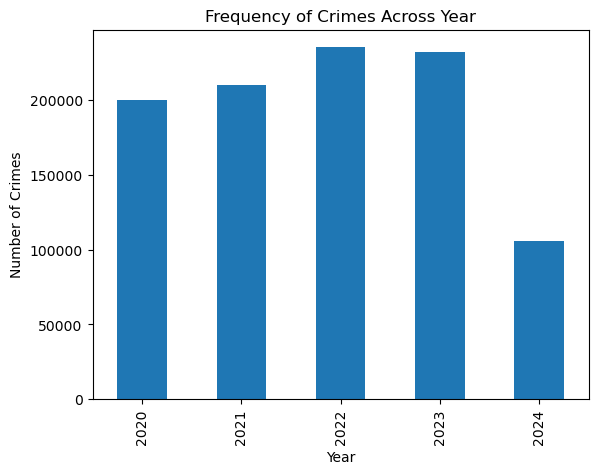

In [18]:
crime_by_year.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Frequency of Crimes Across Year')
plt.ylabel('Number of Crimes')
plt.xlabel('Year')
plt.show()

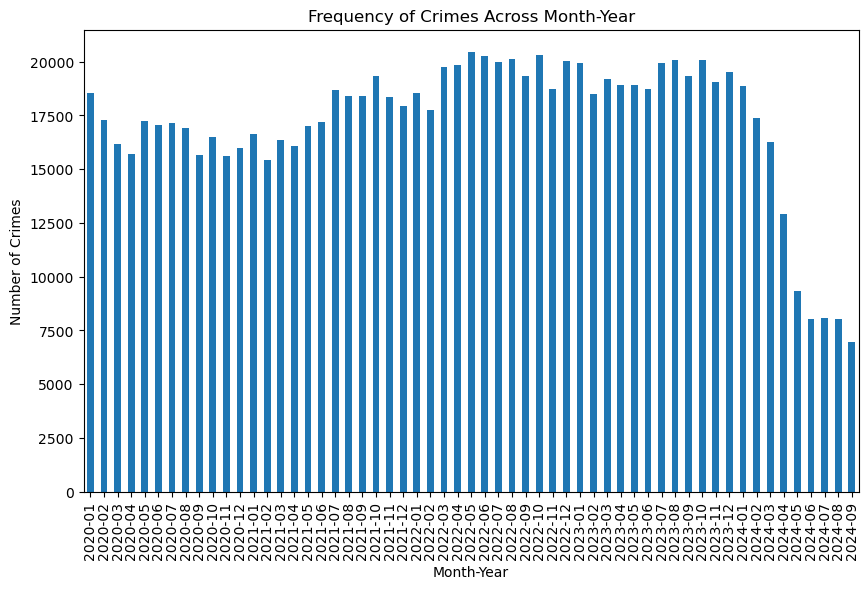

In [19]:
plt.figure(figsize=(10,6))
crime_by_month_year.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Frequency of Crimes Across Month-Year')
plt.ylabel('Number of Crimes')
plt.xlabel('Month-Year')
plt.show()

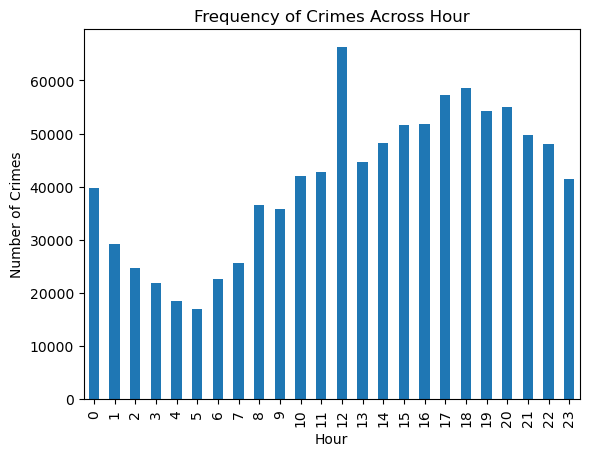

In [20]:
crime_by_hour.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Frequency of Crimes Across Hour')
plt.ylabel('Number of Crimes')
plt.xlabel('Hour')
plt.show()

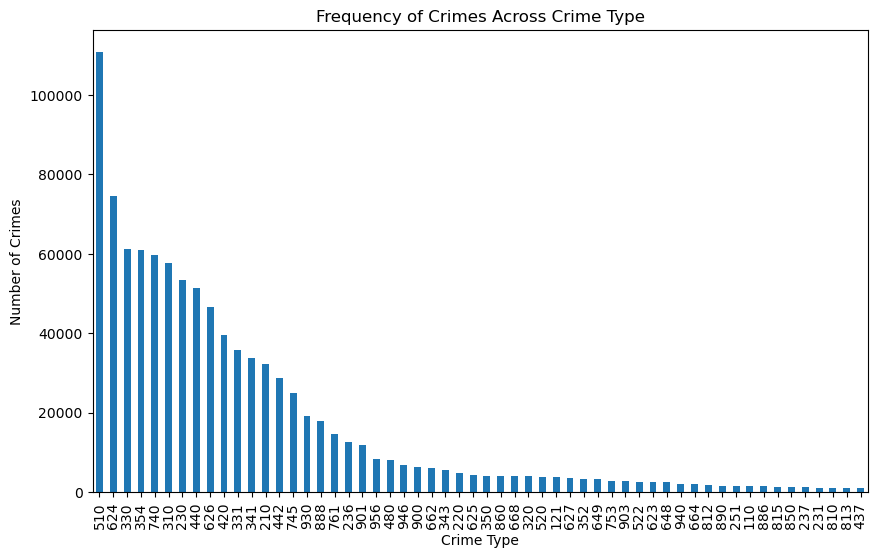

In [21]:
plt.figure(figsize=(10,6))
relevant_crimes = crime_by_type[crime_by_type.values > 1000]
relevant_crimes.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Frequency of Crimes Across Crime Type')
plt.ylabel('Number of Crimes')
plt.xlabel('Crime Type')
plt.show()

In [22]:
data['crime_description'].value_counts().head(10)

crime_description
VEHICLE - STOLEN                                           110804
BATTERY - SIMPLE ASSAULT                                    74688
BURGLARY FROM VEHICLE                                       61324
THEFT OF IDENTITY                                           60867
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     59639
BURGLARY                                                    57743
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              53395
THEFT PLAIN - PETTY ($950 & UNDER)                          51384
INTIMATE PARTNER - SIMPLE ASSAULT                           46696
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             39550
Name: count, dtype: int64

# What Happened? & Imputation

In [23]:
#pip install PyPDF2

In [24]:
import PyPDF2
import re

In [25]:
with open('data/mo_codes.pdf', 'rb') as f:
    reader = PyPDF2.PdfReader(f)
    text = ''
    for page_num in range(len(reader.pages)):
        page = reader.pages[page_num]
        text += page.extract_text()


In [26]:
pattern = r'(\d{4})\s+(.*)'
matches = re.findall(pattern, text)
code_dict = {code: (description.replace('MO CODES', '')
                    .replace('SUSPICIOUS ACTIVITY', "")
                    .replace('TRAFFIC COLLISION', "")
                    .replace('(CAD USE ONLY)', "")
                    .replace('(SAR USE ONLY)', '')
                    .strip()) for code, description in matches}

In [27]:
def code_to_activity(code):
    if len(code) > 4:
        code_list = code.split(' ')
        associated_incidents = ''
        for code in code_list:
            associated_incidents += code_dict[code] + ' & '
    else:
        return code_dict[code]
    return associated_incidents.strip()[:-1].strip()

In [28]:
data.columns

Index(['DR_NO', 'date_reported', 'date_occured', 'time_occured', 'AREA',
       'AREA NAME', 'district_number', 'Part 1-2', 'crime_code',
       'crime_description', 'mo_codes', 'victim_age', 'victim_sex',
       'victim_race', 'premis_code', 'premis_description', 'weapon_code',
       'weapon_description', 'Status', 'status_descriptions', 'crime_code_1',
       'crime_code_2', 'crime_code_3', 'crime_code_4', 'LOCATION',
       'Cross Street', 'LAT', 'LON', 'year_occured', 'month_year_occured',
       'hour_occured'],
      dtype='object')

In [29]:
subset = data[['crime_code', 'date_occured', 'time_occured', 'AREA', 'district_number', 'victim_age', 'mo_codes', 'victim_sex', 'victim_race',
               'premis_code', 'weapon_code', 'LAT', 'LON']]
subset.head()

,crime_code,date_occured,time_occured,AREA,district_number,victim_age,mo_codes,victim_sex,victim_race,premis_code,weapon_code,LAT,LON
0,510,03/01/2020 12:00:00 AM,2130,7,784,0,NaN,M,Other,101.0,0.0,34.0375,-118.3506
1,330,02/08/2020 12:00:00 AM,1800,1,182,47,"[1822, 1402, 0344]",M,Other,128.0,0.0,34.0444,-118.2628
2,480,11/04/2020 12:00:00 AM,1700,3,356,19,"[0344, 1251]",X,Unknown,502.0,0.0,34.0210,-118.3002
3,343,03/10/2020 12:00:00 AM,2037,9,964,19,"[0325, 1501]",M,Other,405.0,0.0,34.1576,-118.4387
4,354,08/17/2020 12:00:00 AM,1200,6,666,28,"[1822, 1501, 0930, 2004]",M,Hispanic,102.0,0.0,34.0944,-118.3277


In [30]:
subset['mo_codes'].isna().value_counts(normalize=True)


mo_codes
False    0.852171
True     0.147829
Name: proportion, dtype: float64

In [31]:
missing_num = subset['mo_codes'].isna().value_counts().iloc[1]
missing_num

145262

In [32]:
import numpy as np

In [33]:
subset.loc[:, 'mo_codes'] = subset['mo_codes'].apply(lambda x: [] if type(x) == float else x)
subset['mo_codes']

0                                           []
1                           [1822, 1402, 0344]
2                                 [0344, 1251]
3                                 [0325, 1501]
4                     [1822, 1501, 0930, 2004]
                          ...                 
982633                            [0344, 1822]
982634                                      []
982635                      [0329, 0400, 0416]
982636    [1822, 0334, 0416, 0445, 0449, 1202]
982637                                      []
Name: mo_codes, Length: 982638, dtype: object

In [34]:
subset_notna = subset[subset['mo_codes'].apply(lambda x: len(x) > 0)]['mo_codes']
subset_notna

1                           [1822, 1402, 0344]
2                                 [0344, 1251]
3                                 [0325, 1501]
4                     [1822, 1501, 0930, 2004]
5                     [1822, 0100, 0930, 0929]
                          ...                 
982631                                  [0385]
982632    [2047, 0400, 0429, 0444, 1202, 1822]
982633                            [0344, 1822]
982635                      [0329, 0400, 0416]
982636    [1822, 0334, 0416, 0445, 0449, 1202]
Name: mo_codes, Length: 837376, dtype: object

In [35]:
subset = pl.from_pandas(subset)
subset_notna = pl.from_pandas(subset_notna)

In [36]:
code_samp = np.random.choice(subset_notna, size=missing_num)
code_samp

array([array(['1822', '1602', '0397'], dtype=object),
       array(['0344', '1202'], dtype=object),
       array(['0216', '1822', '1607'], dtype=object), ...,
       array(['0400', '0417', '0356'], dtype=object),
       array(['0329', '1822', '1307'], dtype=object),
       array(['2004', '1402'], dtype=object)], dtype=object)

In [37]:
subset = subset.to_pandas()

In [38]:
subset.loc[subset['mo_codes'].apply(lambda x: len(x) == 0),'mo_codes'] = code_samp

In [39]:
subset.head()

,crime_code,date_occured,time_occured,AREA,district_number,victim_age,mo_codes,victim_sex,victim_race,premis_code,weapon_code,LAT,LON
0,510,03/01/2020 12:00:00 AM,2130,7,784,0,"[1822, 1602, 0397]",M,Other,101.0,0.0,34.0375,-118.3506
1,330,02/08/2020 12:00:00 AM,1800,1,182,47,"[1822, 1402, 0344]",M,Other,128.0,0.0,34.0444,-118.2628
2,480,11/04/2020 12:00:00 AM,1700,3,356,19,"[0344, 1251]",X,Unknown,502.0,0.0,34.0210,-118.3002
3,343,03/10/2020 12:00:00 AM,2037,9,964,19,"[0325, 1501]",M,Other,405.0,0.0,34.1576,-118.4387
4,354,08/17/2020 12:00:00 AM,1200,6,666,28,"[1822, 1501, 0930, 2004]",M,Hispanic,102.0,0.0,34.0944,-118.3277


# Age Imputation

In [40]:
non_zero_age = subset[subset['victim_age'] > 0]['victim_age']
zero_age = subset[subset['victim_age'] <= 0]
zero_age_len = len(zero_age)
non_zero_samp = np.random.choice(non_zero_age, size=zero_age_len, replace=True)
non_zero_samp

array([48, 26, 20, ..., 14, 30, 28])

In [41]:
subset.loc[subset['victim_age'] <= 0, 'victim_age'] = non_zero_samp

# Gender Imputation

In [42]:
non_nan_sex = subset[subset['victim_sex'].isna() == False]['victim_sex']
nan_sex = subset[subset['victim_sex'].isna()]
nan_sex_len = len(nan_sex)
non_nan_samp = np.random.choice(non_nan_sex, size=nan_sex_len, replace=True)
non_nan_samp

array(['M', 'F', 'F', ..., 'M', 'F', 'F'], dtype=object)

In [43]:
subset.loc[subset['victim_sex'].isna(), 'victim_sex'] = non_nan_samp

# Machine Learning

In [44]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

### Categorical Encoding

In [45]:
subset_ml = subset.copy()

### Encoding for Mo Codes

In [46]:
import hashlib

In [47]:
subset_ml['mo_codes_hashed'] = subset_ml['mo_codes'].apply(lambda x: int(hashlib.sha256(str(x).encode('utf-8')).hexdigest(), 16) % 10**8)

### Date Cleaning / Categorical Encoding

In [48]:
subset_ml['date_occured'] = pd.to_datetime(subset_ml['date_occured'], format='mixed')
subset_ml['year'] = subset_ml['date_occured'].dt.year
subset_ml['month'] = subset_ml['date_occured'].dt.month
subset_ml['day'] = subset_ml['date_occured'].dt.day
subset_ml = subset_ml.drop(columns=['date_occured'])

In [49]:
subset_ml['crime_code'] = subset_ml['crime_code'].astype('category')
subset_ml['AREA'] = subset_ml['AREA'].astype('category')
subset_ml['district_number'] = subset_ml['district_number'].astype('category')
subset_ml['victim_sex'] = subset_ml['victim_sex'].astype('category')
subset_ml['victim_race'] = subset_ml['victim_race'].astype('category')
subset_ml['premis_code'] = subset_ml['premis_code'].astype('category')
subset_ml['weapon_code'] = subset_ml['weapon_code'].astype('category')
subset_ml['mo_codes_hashed'] = subset_ml['mo_codes_hashed'].astype('category')
subset_ml['year'] = subset_ml['year'].astype('category')
subset_ml['month'] = subset_ml['month'].astype('category')
subset_ml['day'] = subset_ml['day'].astype('category')

In [50]:
subset_ml = subset_ml.dropna()

# Classification Algorithm

# LightGBM

In [51]:
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

In [52]:
X = subset_ml.drop(columns=['crime_code', 'mo_codes', 'LAT', 'LON'])
y = subset_ml['crime_code']

In [53]:
unique_values_by_col = {col: X[col].unique() for col in X.columns}

In [54]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded, test_size=0.2)

In [101]:
X_test = X_test.reset_index(drop=True)

In [56]:
categorical_features = list((X_train.dtypes == 'category').index)

In [57]:
categorical_features

['time_occured',
 'AREA',
 'district_number',
 'victim_age',
 'victim_sex',
 'victim_race',
 'premis_code',
 'weapon_code',
 'mo_codes_hashed',
 'year',
 'month',
 'day']

In [58]:
train_dat = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features, free_raw_data=False)
test_dat = lgb.Dataset(X_test, label=y_test, reference=train_dat, categorical_feature=categorical_features, free_raw_data=False)

## Data Export for Front End

In [73]:
dat1 = train_dat.data
label1 = train_dat.label
df_train = pd.DataFrame(dat1)
df_train['label'] = label1

In [74]:
dat2 = test_dat.data
label2 = test_dat.label
df_test = pd.DataFrame(dat2)
df_test['label'] = label2

In [77]:
export_dat = pd.concat([df_train, df_test], axis=0)
export_dat.to_csv('data/exported_data.csv.gz', index=False, compression='gzip')

## Back to Machine Learning

In [57]:
import os
os.environ["OMP_NUM_THREADS"] = "8"


In [58]:
params ={
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'num_class': len(le.classes_),
    'num_leaves': 200,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'max_depth': 20,
    'min_data_in_leaf': 30,
    'bagging_fraction': 0.9,
    'bagging_freq': 5
}

In [59]:
params['lambda_l1'] = 0.1
params['lambda_l2'] = 0.1
params['is_unbalance'] = True

In [60]:
from sklearn.model_selection import StratifiedKFold


all_scores = []
best_model = None
best_score = float('inf')


kf = StratifiedKFold(n_splits=5, shuffle=True)
for train_idx, val_idx in kf.split(X, y_encoded):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y_encoded[train_idx], y_encoded[val_idx]
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)
    bst = lgb.train(params, train_data, valid_sets=[val_data], callbacks=[lgb.early_stopping(stopping_rounds=3)])

    y_val_pred = bst.predict(X_val, num_iternation=bst.best_iteration)
    y_val_pred_labels = y_val_pred.argmax(axis=1)
    score = accuracy_score(y_val, y_val_pred_labels)

    all_scores.append(score)
    if score < best_score:
        best_score = score
        best_model = bst
    

/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010955 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7430
[LightGBM] [Info] Number of data points in the train set: 786097, number of used features: 12
[LightGBM] [Info] Start training from score -6.442338
[LightGBM] [Info] Start training from score -11.783076
[LightGBM] [Info] Start training from score -5.572811
[LightGBM] [Info] Start training from score -8.033572
[LightGBM] [Info] Start training from score -3.418568
[LightGBM] [Info] Start training from score -5.315119
[LightGBM] [Info] Start training from score -2.912507
[LightGBM] [Info] Start training fro

In [61]:
best_score

0.6108535809693423

In [59]:
best_model = lgb.Booster(model_file='lgb_model.txt')

In [60]:
from sklearn.metrics import recall_score, f1_score

# Predict on the test set
y_test_pred = best_model.predict(X_test, num_iteration=best_model.best_iteration)
y_test_pred_labels = y_test_pred.argmax(axis=1)

# Calculate recall
recall = recall_score(y_test, y_test_pred_labels, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred_labels, average='weighted')


recall, f1

(0.7299478437857779, 0.7139546296194745)

In [61]:
accuracy_score(y_test, y_test_pred_labels)

0.7299478437857779

In [62]:
from sklearn.metrics import precision_score

In [64]:
precision_score(y_test, y_test_pred_labels, average='weighted')

/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.7336657145985012

# Fairness Checks

In [71]:
X_test['victim_race'].value_counts()

victim_race
Hispanic            58462
Unknown             48231
White               39606
Black               26778
Other               15301
Other Asian          4263
Korean               1174
Filipino              898
Chinese               856
Japanese              305
Vietnamese            224
American Indian       196
Asian Indian           82
Pacific Islander       54
Hawaiian               47
Cambodian              14
Laotian                13
Guamanian              12
Samoan                  9
Name: count, dtype: int64

### Whites

In [106]:
whites_test_X = X_test[X_test['victim_race'] == 'White']
whites_test_X.head()

,time_occured,AREA,district_number,victim_age,victim_sex,victim_race,premis_code,weapon_code,mo_codes_hashed,year,month,day
0,1900,5,515,37,M,White,101.0,0.0,19340250,2020,12,11
15,1700,8,823,57,F,White,103.0,0.0,88751662,2022,6,3
16,1,14,1445,63,M,White,502.0,115.0,86001705,2024,4,1
31,945,10,1067,25,M,White,402.0,400.0,22002024,2022,1,5
33,1900,9,998,55,F,White,123.0,0.0,84876895,2022,3,5


In [103]:
whites_test_y = y_test[whites_test_X.index]
whites_test_y

array([28, 59,  6, ..., 62, 38,  4])

In [91]:
y_test_pred_whites = best_model.predict(whites_test_X, num_iteration=best_model.best_iteration)
y_test_pred_labels_whites = y_test_pred_whites.argmax(axis=1)

In [104]:
accuracy_whites = accuracy_score(whites_test_y, y_test_pred_labels_whites)
recall_whites = recall_score(whites_test_y, y_test_pred_labels_whites, average='weighted')
f1_whites = f1_score(whites_test_y, y_test_pred_labels_whites, average='weighted')
precision_whites = precision_score(whites_test_y, y_test_pred_labels_whites, average='weighted')

accuracy_whites, precision_whites, recall_whites, f1_whites

/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.7233247487754381,
 0.7327591071124131,
 0.7233247487754381,
 0.7137168299553763)

### Blacks

In [108]:
blacks_test_X = X_test[X_test['victim_race'] == 'Black']
blacks_test_X.head()

,time_occured,AREA,district_number,victim_age,victim_sex,victim_race,premis_code,weapon_code,mo_codes_hashed,year,month,day
2,1900,18,1802,21,M,Black,101.0,109.0,54353693,2024,3,3
6,1800,12,1266,70,F,Black,501.0,0.0,63757765,2021,8,12
10,1755,12,1253,27,F,Black,203.0,400.0,50358648,2021,4,21
12,2250,2,279,44,M,Black,108.0,400.0,64863242,2023,10,17
13,915,6,625,41,F,Black,502.0,400.0,49018034,2023,5,6


In [109]:
blacks_test_y = y_test[blacks_test_X.index]
blacks_test_y

array([  6, 113,   4, ...,  64, 112,  64])

In [110]:
y_test_pred_blacks = best_model.predict(blacks_test_X, num_iteration=best_model.best_iteration)
y_test_pred_labels_blacks = y_test_pred_blacks.argmax(axis=1)

In [111]:
accuracy_blacks = accuracy_score(blacks_test_y, y_test_pred_labels_blacks)
recall_blacks = recall_score(blacks_test_y, y_test_pred_labels_blacks, average='weighted')
f1_blacks = f1_score(blacks_test_y, y_test_pred_labels_blacks, average='weighted')
precision_blacks = precision_score(blacks_test_y, y_test_pred_labels_blacks, average='weighted')

accuracy_blacks, precision_blacks, recall_blacks, f1_blacks

/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.7020688624990664,
 0.7170015627275382,
 0.7020688624990664,
 0.6906849805264975)

### Hispanics

In [112]:
hispanic_test_X = X_test[X_test['victim_race'] == 'Hispanic']
hispanic_test_X.head()

,time_occured,AREA,district_number,victim_age,victim_sex,victim_race,premis_code,weapon_code,mo_codes_hashed,year,month,day
5,1800,20,2035,30,F,Hispanic,203.0,301.0,77118120,2020,5,23
9,2337,20,2026,37,F,Hispanic,501.0,400.0,55615798,2021,8,1
18,807,3,399,61,M,Hispanic,101.0,109.0,57473674,2020,11,25
20,1,3,362,31,F,Hispanic,502.0,500.0,71249850,2020,8,15
21,2300,18,1829,46,M,Hispanic,122.0,0.0,25268578,2024,3,17


In [113]:
hispanic_test_y = y_test[hispanic_test_X.index]
hispanic_test_y

array([62, 64,  4, ..., 13, 81, 40])

In [114]:
y_test_pred_hispanic = best_model.predict(hispanic_test_X, num_iteration=best_model.best_iteration)
y_test_pred_labels_hispanic = y_test_pred_hispanic.argmax(axis=1)

In [115]:
accuracy_hispanic = accuracy_score(hispanic_test_y, y_test_pred_labels_hispanic)
recall_hispanic = recall_score(hispanic_test_y, y_test_pred_labels_hispanic, average='weighted')
f1_hispanic = f1_score(hispanic_test_y, y_test_pred_labels_hispanic, average='weighted')
precision_hispanic = precision_score(hispanic_test_y, y_test_pred_labels_hispanic, average='weighted')

accuracy_hispanic, precision_hispanic, recall_hispanic, f1_hispanic

/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.7174232835003934,
 0.7278651461858592,
 0.7174232835003934,
 0.7054562882941838)

### Others

In [117]:
others_test_X = X_test[X_test['victim_race'].isin(['White', 'Black', 'Hispanic']) == False]
others_test_X.head()

,time_occured,AREA,district_number,victim_age,victim_sex,victim_race,premis_code,weapon_code,mo_codes_hashed,year,month,day
1,1830,20,2062,40,X,Unknown,203.0,200.0,38384571,2020,3,19
3,2200,2,218,32,F,Unknown,101.0,0.0,67042260,2022,2,9
4,1000,20,2019,42,F,Unknown,101.0,0.0,63906935,2023,7,24
7,452,14,1431,60,X,Unknown,203.0,0.0,26329990,2022,6,22
8,1200,18,1871,50,F,Unknown,101.0,0.0,87248879,2024,2,1


In [118]:
other_test_y = y_test[others_test_X.index]
other_test_y

array([  4,  57,  28, ...,  57,  80, 125])

In [119]:
y_test_pred_other = best_model.predict(others_test_X, num_iteration=best_model.best_iteration)
y_test_pred_labels_other = y_test_pred_other.argmax(axis=1)

In [120]:
accuracy_other = accuracy_score(other_test_y, y_test_pred_labels_other)
recall_other = recall_score(other_test_y, y_test_pred_labels_other, average='weighted')
f1_other = f1_score(other_test_y, y_test_pred_labels_other, average='weighted')
precision_other = precision_score(other_test_y, y_test_pred_labels_other, average='weighted')

accuracy_other, precision_other, recall_other, f1_other

/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.7542376428242582,
 0.7426884720857536,
 0.7542376428242582,
 0.7248954125665213)

# Feature Importance

In [121]:
importance = best_model.feature_importance(importance_type='split')
features = X_train.columns

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

In [122]:
feature_importance_df

,Feature,Importance
0,time_occured,295660
3,victim_age,242948
2,district_number,66195
4,victim_sex,32242
11,day,30207
8,mo_codes_hashed,21009
6,premis_code,13295
1,AREA,6131
10,month,5675
7,weapon_code,5301


# To GeoJson

In [55]:
subset_ml['date'] = subset['date_occured']

In [71]:
import json
import gzip

In [69]:
def df_to_geojson(df, lat_col, lon_col, properties):
    features = []
    for _, row in df.iterrows():
        feature = {
            'type': 'Feature',
            'geometry': {
            'type': 'Point',
            'coordinates': [row[lon_col], row[lat_col]]
            },
            'properties': {col: row[col] for col in properties}
        }
        features.append(feature)
    return {
        'type': 'FeatureCollection',
        'features': features
    }

In [72]:
geojson_dat = df_to_geojson(
    df=subset_ml,
    lat_col='LAT',
    lon_col='LON',
    properties=['crime_code', 'date']
)

output_file = 'la_crime_data.geojson.gz'
with gzip.open(output_file, 'wt', encoding='utf-8') as f:
    json.dump(geojson_dat, f)

# Save Model

In [64]:
import shutil

In [63]:
best_model.save_model('lgb_model.txt')

In [65]:
with open('lgb_model.txt', 'rb') as f_in:
    with gzip.open('lgb_model.txt.gz', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)